# Sentiment Analysis of twitter account

### 1. Importing libraries

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
import tweepy
import re
from textblob import TextBlob

### 2. Twitter Authentication

In [2]:
consumer_key = "uYOQyrDxu3N4DhvnVg4MHKuGy" #Your API/Consumer key 
consumer_secret = "7d3utI5xlEzxzBlvMEIyAEtXs82NHrVSbDvHOPUGrYS0FAIEKY" #Your API/Consumer Secret Key
access_token = "1146475292057227264-5qeqpVgxqXlqaDDOWQ8AYzPysLlYsb"    #Your Access token key
access_token_secret = "Z7FNP3cPmppHgHjm4kgFgD2ypcUsaGmmin47BmbfM7z1O" #Your Access token Secret key

#Pass in our twitter API authentication key
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)

#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)

### 3. Fetching tweets of Account

In [3]:
username = input('Enter the username of the account: ')
no_of_tweets =int(input('Enter the number of tweets you want to analyse: '))


try:
    #The number of tweets we want to retrieved from the user
    tweets = api.user_timeline(screen_name=username, count=no_of_tweets)
    
    #Pulling Some attributes from the tweet
    attributes_container = [[tweet.created_at, tweet.favorite_count,tweet.source,  tweet.text] for tweet in tweets]

    #Creation of column list to rename the columns in the dataframe
    columns = ["Date Created", "Number of Likes", "Source of Tweet", "Tweet"]
    
    #Creation of Dataframe
    tweets_df = pd.DataFrame(attributes_container, columns=columns)
except BaseException as e:
    print('Status Failed On,',str(e))
    time.sleep(3)

Enter the username of the account: JoeBiden
Enter the number of tweets you want to analyse: 1000


In [4]:
tweets_df

,Date Created,Number of Likes,Source of Tweet,Tweet
0,2022-10-08 02:00:13+00:00,8114,Sprout Social,MAGA Republicans can’t be pro-law enforcement ...
1,2022-10-08 00:30:01+00:00,8141,Sprout Social,Today's jobs numbers are an encouraging sign t...
2,2022-10-07 23:00:00+00:00,3987,Twitter Media Studio,This year’s elections are absolutely critical....
3,2022-10-07 21:13:20+00:00,41088,Sprout Social,Many Republicans have called the Bipartisan In...
4,2022-10-07 18:44:01+00:00,10137,Sprout Social,"Last year, a family of four saved an average o..."
...,...,...,...,...
195,2022-08-03 01:36:18+00:00,21097,Twitter Web App,The bipartisan PACT Act is the biggest expansi...
196,2022-08-03 01:20:45+00:00,0,Twitter Web App,"RT @POTUS: Congress has passed the PACT Act, a..."
197,2022-08-02 20:42:02+00:00,11596,Sprout Social,126 economists wrote that the Inflation Reduct...
198,2022-08-01 23:39:14+00:00,0,Twitter Web App,RT @POTUS: I’m addressing the nation on a succ...


### 4. Cleaning Tweets for analysis

In [5]:
tweets_df.drop_duplicates(inplace = True)

In [8]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweets_df)
tw_list['text'] = tweets_df['Tweet']
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',' ',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,Date Created,Number of Likes,Source of Tweet,Tweet,text
0,2022-10-08 02:00:13+00:00,8114,Sprout Social,MAGA Republicans can’t be pro-law enforcement ...,maga republicans can t be pro law enforcement ...
1,2022-10-08 00:30:01+00:00,8141,Sprout Social,Today's jobs numbers are an encouraging sign t...,today s jobs numbers are an encouraging sign t...
2,2022-10-07 23:00:00+00:00,3987,Twitter Media Studio,This year’s elections are absolutely critical....,this year s elections are absolutely critical ...
3,2022-10-07 21:13:20+00:00,41088,Sprout Social,Many Republicans have called the Bipartisan In...,many republicans have called the bipartisan in...
4,2022-10-07 18:44:01+00:00,10137,Sprout Social,"Last year, a family of four saved an average o...",last year a family of four saved an average o...
5,2022-10-07 15:00:25+00:00,20469,Sprout Social,The United States must lead the world in produ...,the united states must lead the world in produ...
6,2022-10-07 02:20:00+00:00,32884,Sprout Social,Extreme MAGA Republican Senator Ron Johnson wa...,extreme maga republican senator ron johnson wa...
7,2022-10-07 00:38:00+00:00,33021,Sprout Social,Sending people to prison for possessing mariju...,sending people to prison for possessing mariju...
8,2022-10-06 23:24:00+00:00,4384,Sprout Social,The CHIPs and Science Act makes historic inves...,the chips and science act makes historic inves...
9,2022-10-06 22:48:00+00:00,17440,Sprout Social,Too many lives have been upended because of ou...,too many lives have been upended because of ou...


### 5. Sentiment Analysis

In [12]:
tw_list[['polarity','subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list.loc[index, 'sentiment'] = 'neutral'
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,Date Created,Number of Likes,Source of Tweet,Tweet,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-10-08 02:00:13+00:00,8114,Sprout Social,MAGA Republicans can’t be pro-law enforcement ...,maga republicans can t be pro law enforcement ...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
1,2022-10-08 00:30:01+00:00,8141,Sprout Social,Today's jobs numbers are an encouraging sign t...,today s jobs numbers are an encouraging sign t...,0.333333,0.500000,positive,NaN,NaN,NaN,NaN
2,2022-10-07 23:00:00+00:00,3987,Twitter Media Studio,This year’s elections are absolutely critical....,this year s elections are absolutely critical ...,0.000000,0.800000,negative,NaN,NaN,NaN,NaN
3,2022-10-07 21:13:20+00:00,41088,Sprout Social,Many Republicans have called the Bipartisan In...,many republicans have called the bipartisan in...,0.500000,0.500000,neutral,0.0,1.0,0.0,0.0
4,2022-10-07 18:44:01+00:00,10137,Sprout Social,"Last year, a family of four saved an average o...",last year a family of four saved an average o...,-0.050000,0.155556,positive,NaN,NaN,NaN,NaN
5,2022-10-07 15:00:25+00:00,20469,Sprout Social,The United States must lead the world in produ...,the united states must lead the world in produ...,0.500000,0.888889,positive,NaN,NaN,NaN,NaN
6,2022-10-07 02:20:00+00:00,32884,Sprout Social,Extreme MAGA Republican Senator Ron Johnson wa...,extreme maga republican senator ron johnson wa...,0.036111,0.388889,negative,NaN,NaN,NaN,NaN
7,2022-10-07 00:38:00+00:00,33021,Sprout Social,Sending people to prison for possessing mariju...,sending people to prison for possessing mariju...,0.500000,0.500000,negative,NaN,NaN,NaN,NaN
8,2022-10-06 23:24:00+00:00,4384,Sprout Social,The CHIPs and Science Act makes historic inves...,the chips and science act makes historic inves...,0.200000,0.300000,positive,NaN,NaN,NaN,NaN
9,2022-10-06 22:48:00+00:00,17440,Sprout Social,Too many lives have been upended because of ou...,too many lives have been upended because of ou...,0.000000,0.400000,negative,NaN,NaN,NaN,NaN


### 6. Creating new data frames for all sentiments (positive, negative and neutral)

In [13]:
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [14]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])#Count_values for sentiment
df = count_values_in_column(tw_list,'sentiment')

In [15]:
df

,Total,Percentage
positive,106,53.0
negative,50,25.0
neutral,44,22.0


### 7. Creating Pie Chart

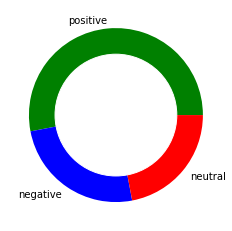

In [16]:
pichart = count_values_in_column(tw_list,'sentiment')
names= df.index
size=df['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()